In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

Vamos a aprender como usar métodos de regresión para obtener la importancia de las variables que pudieran ayudar a crear modelos de predicción para diferentes situaciones en los que tengamos datos de un cierto fenómenos que está determinado (inicialmente) por un conjunto de variables. Esta metodología  es una parte de machine learnig. Algunas otras metodologías de estadística (que vimos anteriormente) también se aproximan a hacer esto y las vimos como PCA Principal Component Analysis o Análisis de Componentes Principales.  Vamos a mirar otra forma de hacerlo usando Machine Learning. Vamos a ello.

Primero que nada vamos a usar un conjunto de datos que ha sido recogido en Brasil  para la descripción del tráfico de vehículos en la ciudad de Sao Paulo. El conjunto de datos está disponible en https://archive.ics.uci.edu/ml/datasets/Behavior+of+the+urban+traffic+of+the+city+of+Sao+Paulo+in+Brazil. Podemos descargarlos y yo lo tengo acá en la carpeta adjunta. 

## Información del conjunto de datos:

La base de datos fue creada con registros del comportamiento del tráfico urbano de la ciudad de Sao Paulo en Brasil del 14 de diciembre de 2009 al 18 de diciembre de 2009 (De lunes a viernes). Registrado de 7:00 a 20:00 cada 30 minutos. El conjunto de datos Comportamiento del tráfico urbano de la ciudad de Sao Paulo en Brasil fue utilizado en la investigación académica en la Universidade Nove de Julho - Programa de Postgrado en Informática y Gestión del Conocimiento.

In [2]:
data=pd.read_csv("data/Behavior of the urban traffic of the city of Sao Paulo in Brazil.csv",delimiter=";")

In [3]:
data["Slowness in traffic (%)"]=data["Slowness in traffic (%)"].str.replace(",",".")
data["Slowness in traffic (%)"]=data["Slowness in traffic (%)"].astype(np.float64)

En este conjunto de datos la variable a predecir es `Slowness in traffic (%)` o la lentitud del tráfico expresado en porcentaje, y se hace en términos de 16 variables que se miden en campo.

In [4]:
data=data.drop(columns=["Hour (Coded)"])

In [5]:
data

Immobilized bus  Broken Truck  Vehicle excess  Accident victim  \
0                  0             0               0                0   
1                  0             0               0                0   
2                  0             0               0                0   
3                  0             0               0                0   
4                  0             0               0                0   
..               ...           ...             ...              ...   
130                1             0               0                0   
131                0             0               0                2   
132                1             0               0                2   
133                0             4               0                0   
134                0             0               0                0   

     Running over  Fire vehicles  Occurrence involving freight  \
0               0              0                             0   
1               0              0                             0   
2               0              0                             0   
3               0              0                             0   
4               0              0                             0   
..            ...            ...                           ...   
130             1              0                             0   
131             0              0                             0   
132             0              0                             0   
133             0              0                             0   
134             0              0                             0   

     Incident involving dangerous freight  Lack of electricity  Fire  \
0                                       0                    0     0   
1                                       0                    0     0   
2                                       0                    0     0   
3                                       0                    0     0   
4                                       0                    0     0   
..                                    ...                  ...   ...   
130                                     0                    0     0   
131                                     0                    0     0   
132                                     0                    0     0   
133                                     0                    0     0   
134                                     0                    0     0   

     Point of flooding  Manifestations  Defect in the network of trolleybuses  \
0                    0               0                                      0   
1                    0               0                                      0   
2                    0               0                                      0   
3                    0               0                                      0   
4                    0               0                                      0   
..                 ...             ...                                    ...   
130                  0               0                                      1   
131                  0               0                                      0   
132                  0               0                                      0   
133                  0               1                                      0   
134                  0               0                                      0   

     Tree on the road  Semaphore off  Intermittent Semaphore  \
0                   0              0                       0   
1                   0              0                       0   
2                   0              0                       0   
3                   0              0                       0   
4                   0              0                       0   
..                ...            ...                     ...   
130                 0              0                       0   
131      

In [6]:
data.describe().T

count       mean       std  min  25%  \
Immobilized bus                        135.0   0.340741  0.659749  0.0  0.0   
Broken Truck                           135.0   0.874074  1.102437  0.0  0.0   
Vehicle excess                         135.0   0.029630  0.170195  0.0  0.0   
Accident victim                        135.0   0.422222  0.696116  0.0  0.0   
Running over                           135.0   0.118519  0.346665  0.0  0.0   
Fire vehicles                          135.0   0.007407  0.086066  0.0  0.0   
Occurrence involving freight           135.0   0.007407  0.086066  0.0  0.0   
Incident involving dangerous freight   135.0   0.007407  0.086066  0.0  0.0   
Lack of electricity                    135.0   0.118519  0.504485  0.0  0.0   
Fire                                   135.0   0.007407  0.086066  0.0  0.0   
Point of flooding                      135.0   0.118519  0.712907  0.0  0.0   
Manifestations                         135.0   0.051852  0.222554  0.0  0.0   
Defect in the network of trolleybuses  135.0   0.229630  0.818998  0.0  0.0   
Tree on the road                       135.0   0.044444  0.206848  0.0  0.0   
Semaphore off                          135.0   0.125926  0.464077  0.0  0.0   
Intermittent Semaphore                 135.0   0.014815  0.121261  0.0  0.0   
Slowness in traffic (%)                135.0  10.051852  4.363243  3.4  7.4   

                                       50%    75%   max  
Immobilized bus                        0.0   1.00   4.0  
Broken Truck                           1.0   1.00   5.0  
Vehicle excess                         0.0   0.00   1.0  
Accident victim                        0.0   1.00   3.0  
Running over                           0.0   0.00   2.0  
Fire vehicles                          0.0   0.00   1.0  
Occurrence involving freight           0.0   0.00   1.0  
Incident involving dangerous freight   0.0   0.00   1.0  
Lack of electricity                    0.0   0.00   4.0  
Fire                                   0.0   0.00   1.0  
Point of flooding                      0.0   0.00   7.0  
Manifestations                         0.0   0.00   1.0  
Defect in the network of trolleybuses  0.0   0.00   8.0  
Tree on the road                       0.0   0.00   1.0  
Semaphore off                          0.0   0.00   4.0  
Intermittent Semaphore                 0.0   0.00   1.0  
Slowness in traffic (%)                9.0  11.85  23.4

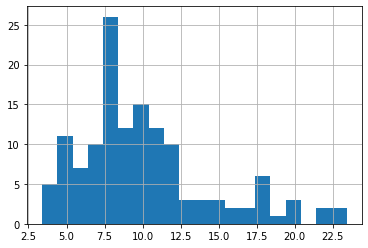

In [7]:
data["Slowness in traffic (%)"].hist(bins=20);

Hagamos algunas visualizaciones primeras.

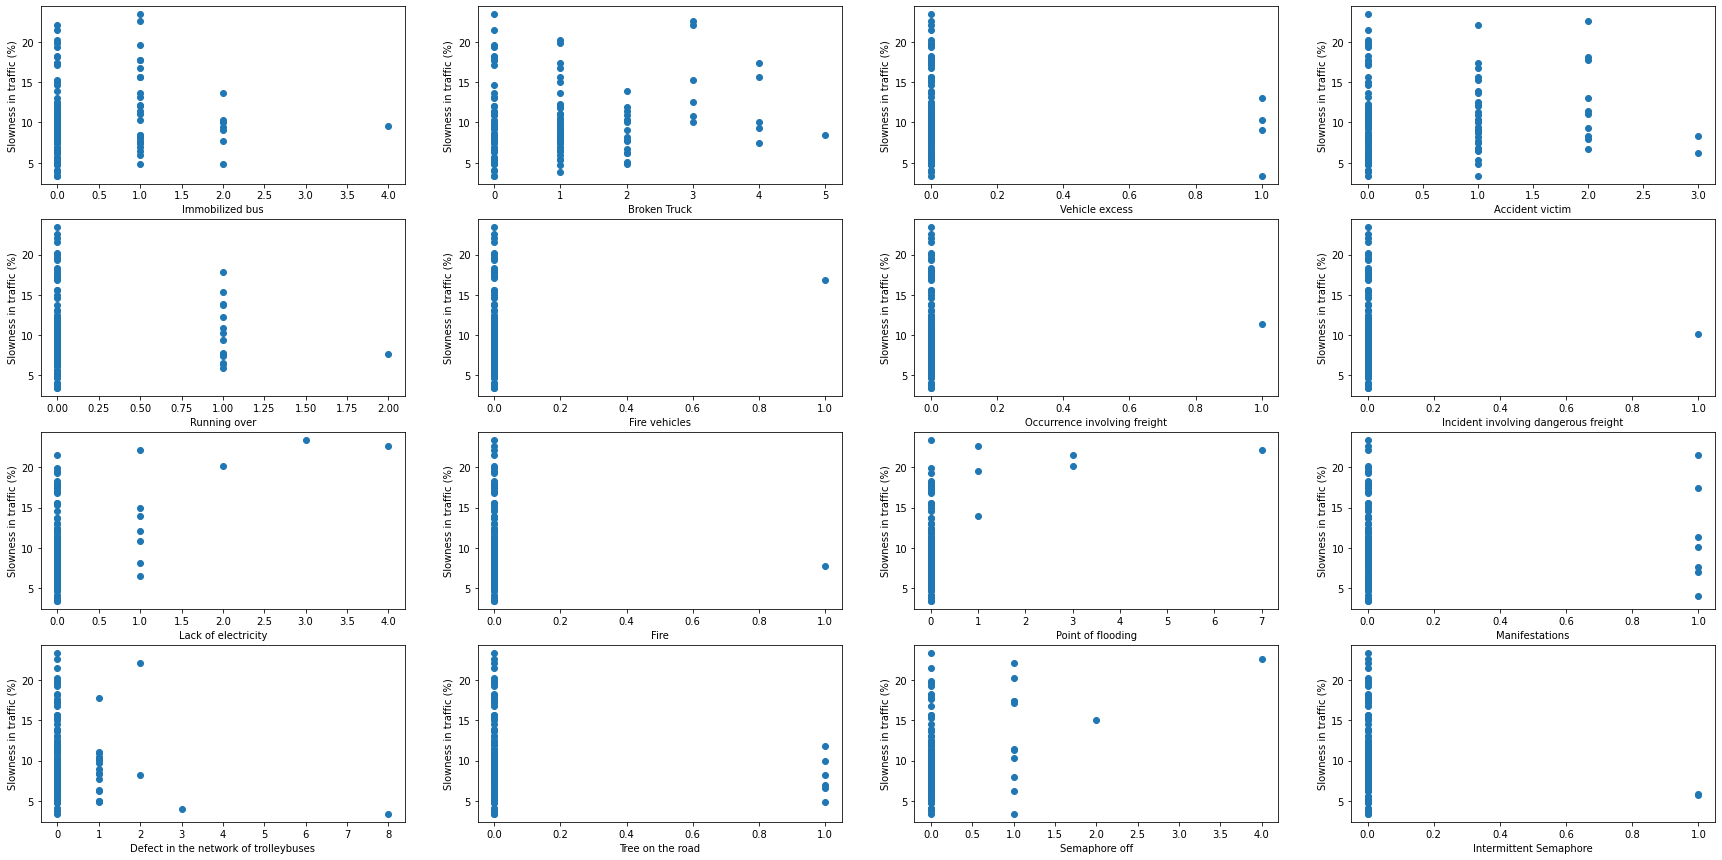

In [8]:
plt.figure(figsize=(30,15))
for i,j in enumerate(data.columns[:-1]):
    plt.subplot(4,4,i+1)
    plt.scatter(data[j],data["Slowness in traffic (%)"])
    plt.xlabel(j)
    plt.ylabel("Slowness in traffic (%)")
plt.show()

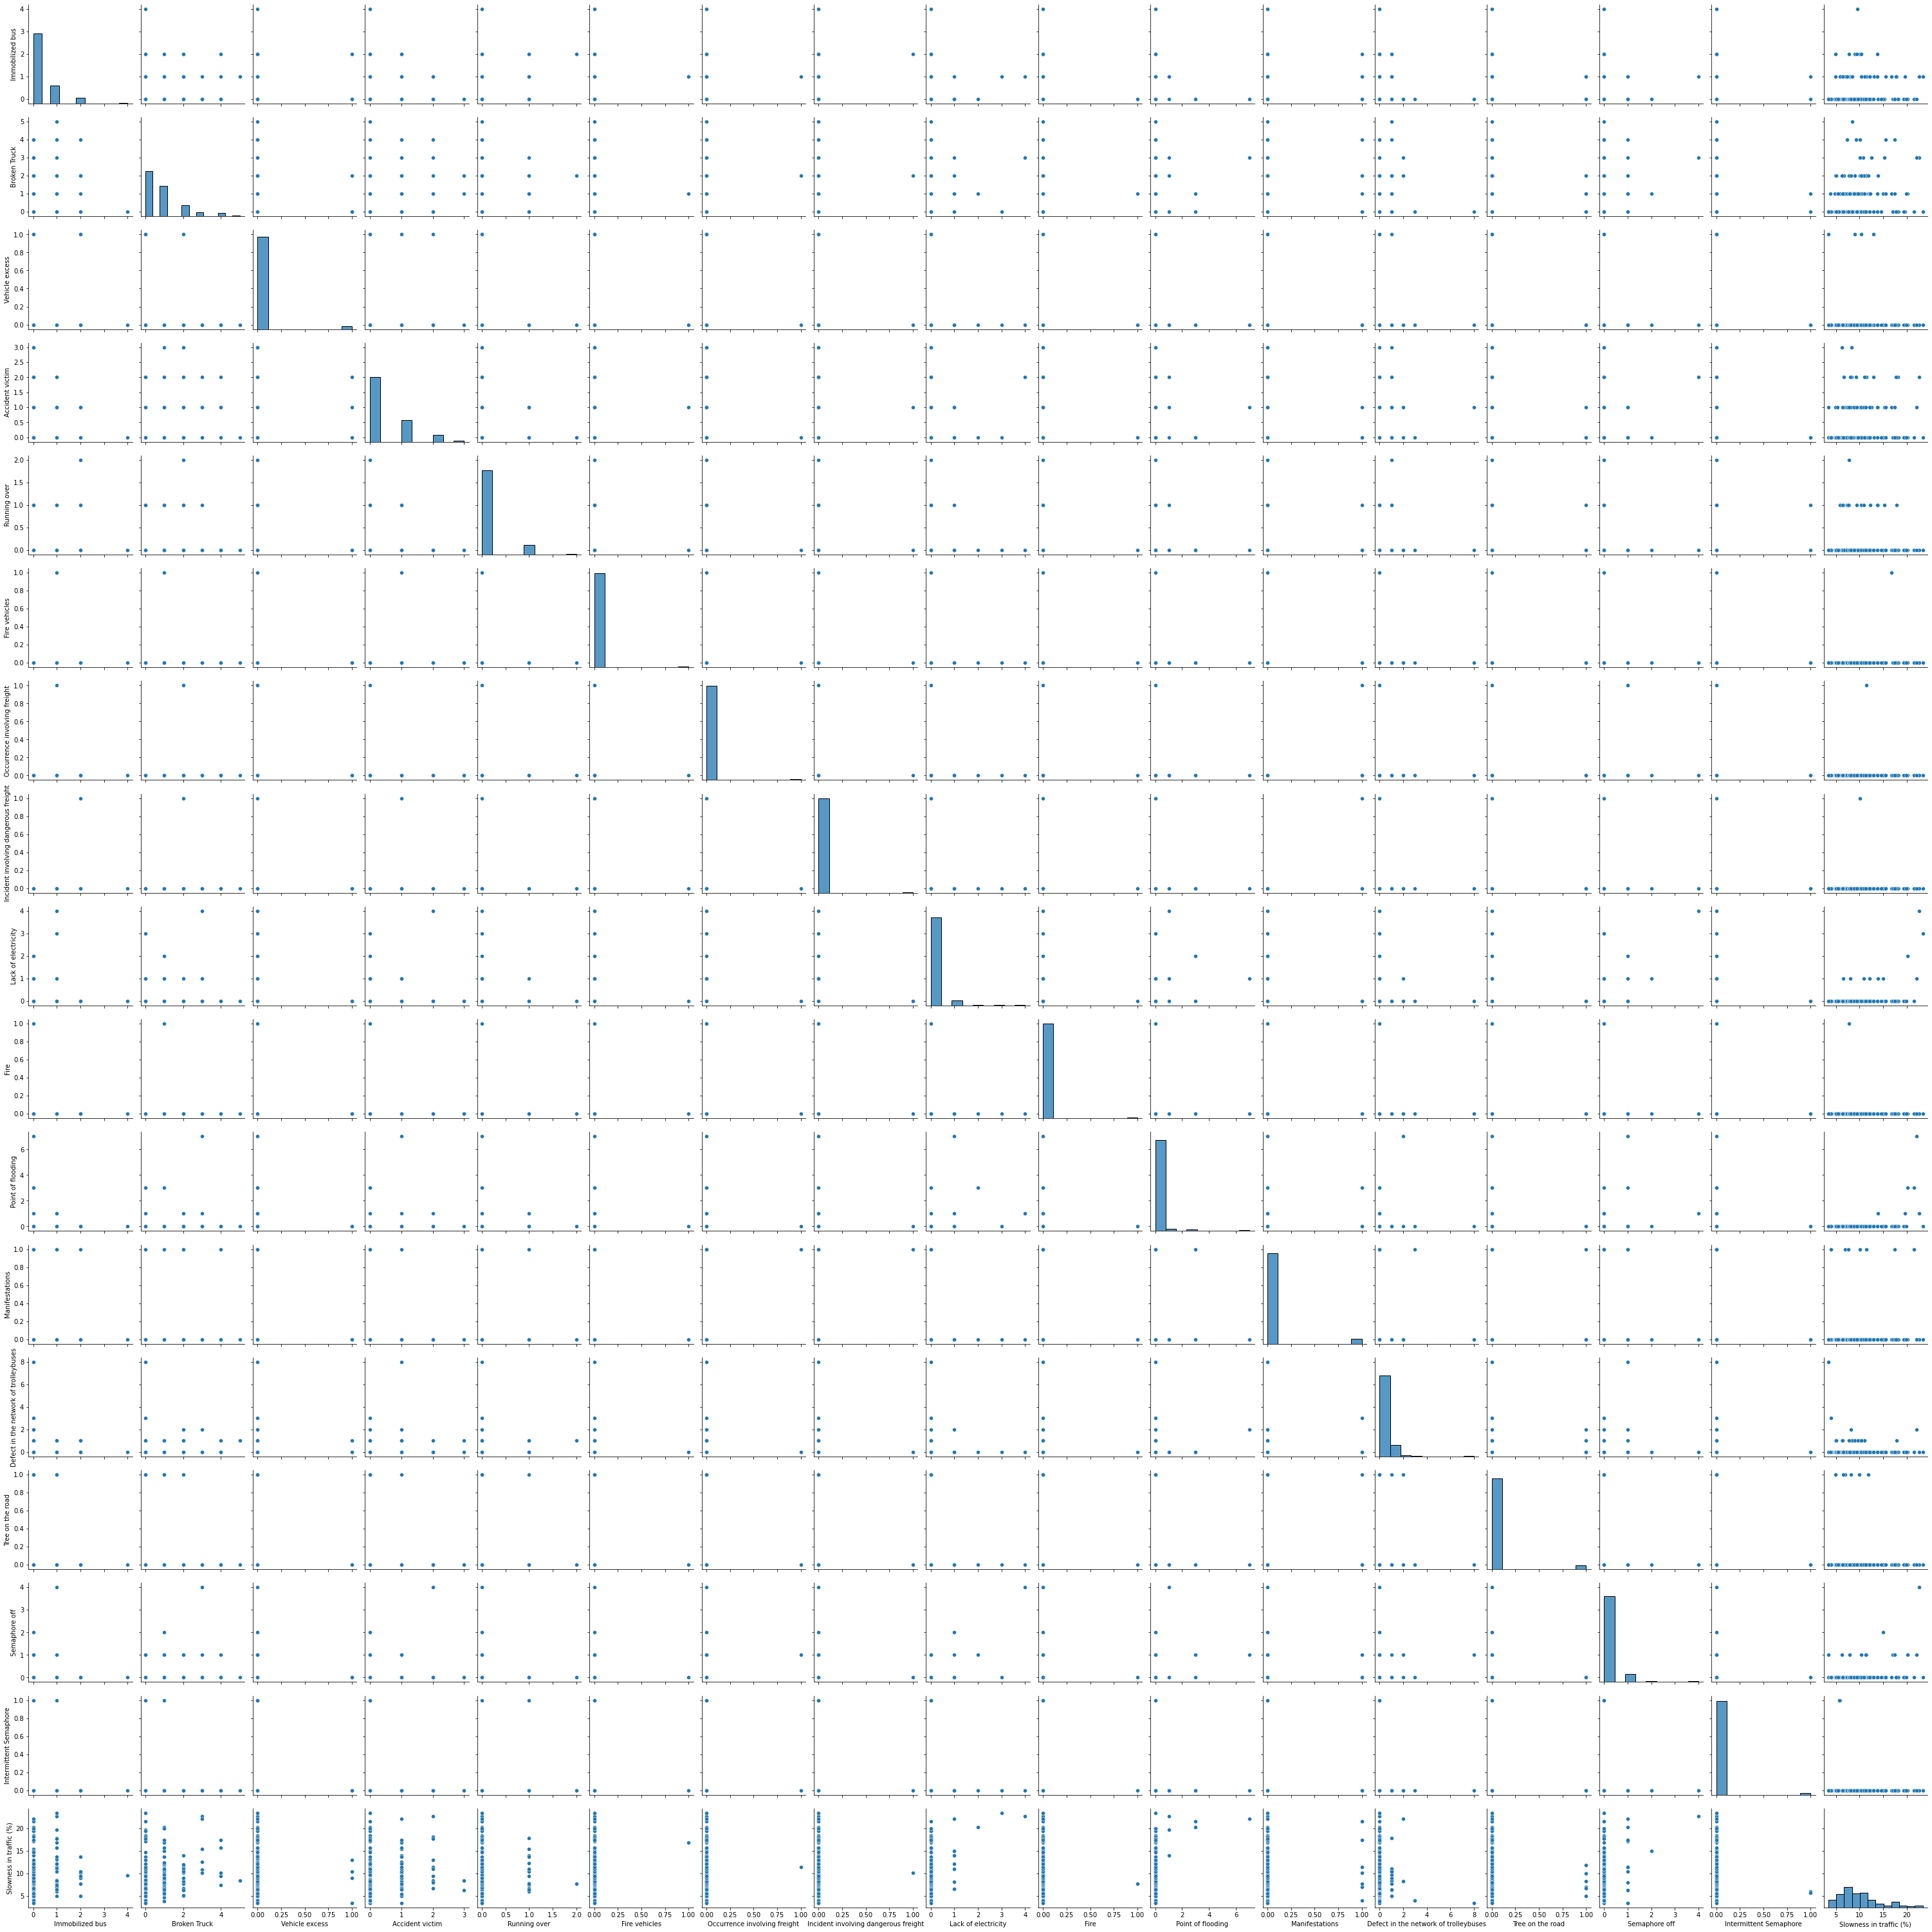

In [9]:
sns.pairplot(data)

El contenido de las variables predictoras es categórico, básicamente presencia o ausencia de una características o posibilidades distintas de dicha característica.

Ahora lo que queremos es hacer por ejemplo una regresión para determinar si la variable "Slowness in traffic (%)" puede ser predicha en término de las 16 anteriores variables. Es posible que lo podamos hacer. Veamos por ejemplo una regresión sencilla usando statmodels de python:

In [10]:
import statsmodels.api as sm

In [11]:
Y = data["Slowness in traffic (%)"]
X = data.drop(columns=["Slowness in traffic (%)"])
# X = sm.add_constant(X)

In [12]:
X

Immobilized bus  Broken Truck  Vehicle excess  Accident victim  \
0                  0             0               0                0   
1                  0             0               0                0   
2                  0             0               0                0   
3                  0             0               0                0   
4                  0             0               0                0   
..               ...           ...             ...              ...   
130                1             0               0                0   
131                0             0               0                2   
132                1             0               0                2   
133                0             4               0                0   
134                0             0               0                0   

     Running over  Fire vehicles  Occurrence involving freight  \
0               0              0                             0   
1               0              0                             0   
2               0              0                             0   
3               0              0                             0   
4               0              0                             0   
..            ...            ...                           ...   
130             1              0                             0   
131             0              0                             0   
132             0              0                             0   
133             0              0                             0   
134             0              0                             0   

     Incident involving dangerous freight  Lack of electricity  Fire  \
0                                       0                    0     0   
1                                       0                    0     0   
2                                       0                    0     0   
3                                       0                    0     0   
4                                       0                    0     0   
..                                    ...                  ...   ...   
130                                     0                    0     0   
131                                     0                    0     0   
132                                     0                    0     0   
133                                     0                    0     0   
134                                     0                    0     0   

     Point of flooding  Manifestations  Defect in the network of trolleybuses  \
0                    0               0                                      0   
1                    0               0                                      0   
2                    0               0                                      0   
3                    0               0                                      0   
4                    0               0                                      0   
..                 ...             ...                                    ...   
130                  0               0                                      1   
131                  0               0                                      0   
132                  0               0                                      0   
133                  0               1                                      0   
134                  0               0                                      0   

     Tree on the road  Semaphore off  Intermittent Semaphore  
0                   0              0                       0  
1                   0              0                       0  
2                   0              0                       0  
3                   0              0                       0  
4                   0              0                       0  
..                ...            ...                     ...  
130                 0              0                       0  
131              

In [13]:
model_linear = sm.OLS(Y, X).fit()
predictions_SM = model_linear.predict(X) 

In [14]:
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Slowness in traffic (%)   R-squared (uncentered):                   0.578
Model:                                 OLS   Adj. R-squared (uncentered):              0.521
Method:                      Least Squares   F-statistic:                              10.18
Date:                     Sat, 11 Jun 2022   Prob (F-statistic):                    1.01e-15
Time:                             08:35:01   Log-Likelihood:                         -456.47
No. Observations:                      135   AIC:                                      944.9
Df Residuals:                          119   BIC:                                      991.4
Df Model:                               16                                                  
Covariance Type:                 nonrobust                                                  
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Immobilized bus                           3.0389      1.082      2.809      0.006       0.897       5.181
Broken Truck                              2.2478      0.604      3.719      0.000       1.051       3.445
Vehicle excess                            2.3983      3.976      0.603      0.548      -5.474      10.271
Accident victim                           3.1982      0.970      3.297      0.001       1.277       5.119
Running over                              1.8914      2.016      0.938      0.350      -2.100       5.883
Fire vehicles                             8.3151      7.693      1.081      0.282      -6.917      23.547
Occurrence involving freight             -3.4977      8.579     -0.408      0.684     -20.485      13.489
Incident involving dangerous freight     -9.9260      8.670     -1.145      0.255     -27.094       7.242
Lack of electricity                       3.2367      1.739      1.861      0.065      -0.207       6.680
Fire                                      5.4522      7.603      0.717      0.475      -9.603      20.507
Point of flooding                         2.0023      1.009      1.985      0.049       0.005       4.000
Manifestations                            6.2545      3.558      1.758      0.081      -0.792      13.301
Defect in the network of trolleybuses    -0.1388      0.827     -0.168      0.867      -1.777       1.499
Tree on the road                          3.3593      3.194      1.052      0.295      -2.965       9.683
Semaphore off                             1.1087      1.914      0.579      0.563      -2.681       4.898
Intermittent Semaphore                    2.2110      5.444      0.406      0.685      -8.569      12.991
==============================================================================
Omnibus:                        1.379   Durbin-Watson:                   0.789
Prob(Omnibus):                  0.502   Jarque-Bera (JB):                0.944
Skew:                          -0.159   Prob(JB):                        0.624
Kurtosis:                       3.259   Cond. No.                         23.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

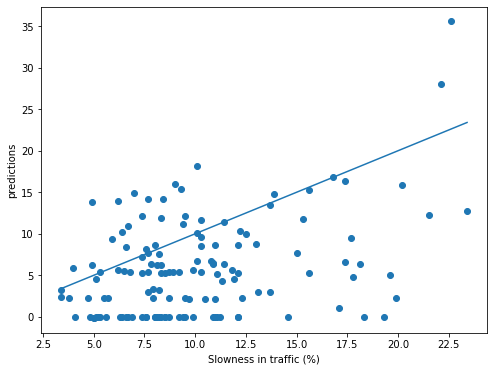

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(data["Slowness in traffic (%)"],predictions_SM)
u=np.linspace(data["Slowness in traffic (%)"].min(),data["Slowness in traffic (%)"].max(),5)
plt.plot(u,u)
plt.xlabel("Slowness in traffic (%)")
plt.ylabel("predictions")
plt.show()

¿Cuánto es el error de predicción?

In [16]:
rmse=np.sqrt(np.mean((data["Slowness in traffic (%)"]-predictions_SM)**2))
print("RMSE del modelo es",rmse)

RMSE del modelo es 7.1159094924779485


Ahora probemos con machine learning a hacer regresiones lineales!

In [17]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [18]:
features=data.drop(columns=["Slowness in traffic (%)"])
target=data["Slowness in traffic (%)"]
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

In [19]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)
prediction_LR =  LR.predict(x_test)
prediction_LR

array([ 8.31410729, 10.43003348,  9.31257564,  9.41860168, 10.10512787,
       10.68785109,  9.41860168,  9.31257564, 12.38401492,  9.41860168,
        8.68255537,  9.84620765,  8.11063754,  9.10665952,  9.18625904,
       10.05322639, 10.84577861,  9.41860168,  9.41860168,  8.69463419,
        9.41860168, 10.74478591,  9.41860168,  9.41860168,  9.41860168,
       10.4869683 , 10.47579902])

Feature: 0 Immobilized bus, Score: 0.7925522283899987
Feature: 1 Broken Truck, Score: -0.10602603657456589
Feature: 2 Vehicle excess, Score: -1.8174470988735545
Feature: 3 Accident victim, Score: 0.740650741535746
Feature: 4 Running over, Score: 0.6396580391126538
Feature: 5 Fire vehicles, Score: -4.440892098500626e-16
Feature: 6 Occurrence involving freight, Score: -1.998146482246851
Feature: 7 Incident involving dangerous freight, Score: -3.703742368883848
Feature: 8 Lack of electricity, Score: 1.9114173851687148
Feature: 9 Fire, Score: -1.6125756435338563
Feature: 10 Point of flooding, Score: 1.9374012914995644
Feature: 11 Manifestations, Score: 2.271437563608824
Feature: 12 Defect in the network of trolleybuses, Score: -0.9984683519426882
Feature: 13 Tree on the road, Score: -1.1020480172862244
Feature: 14 Semaphore off, Score: 1.1276070832887413
Feature: 15 Intermittent Semaphore, Score: -4.281693795572463


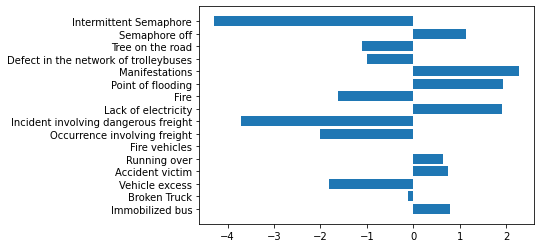

In [20]:
# get importance
var=LR.feature_names_in_
importance = LR.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print(f'Feature: {i} {features.columns[i]}, Score: {v}')
# plot feature importance
plt.barh(var, importance)
plt.show()

In [21]:
pd.DataFrame.from_dict(dict(zip(features.columns,importance)), orient='index').reset_index().rename(columns={"index":"feature", 0:"importance"}).sort_values("importance")

feature    importance
15                 Intermittent Semaphore -4.281694e+00
7    Incident involving dangerous freight -3.703742e+00
6            Occurrence involving freight -1.998146e+00
2                          Vehicle excess -1.817447e+00
9                                    Fire -1.612576e+00
13                       Tree on the road -1.102048e+00
12  Defect in the network of trolleybuses -9.984684e-01
1                            Broken Truck -1.060260e-01
5                           Fire vehicles -4.440892e-16
4                            Running over  6.396580e-01
3                         Accident victim  7.406507e-01
0                         Immobilized bus  7.925522e-01
14                          Semaphore off  1.127607e+00
8                     Lack of electricity  1.911417e+00
10                      Point of flooding  1.937401e+00
11                         Manifestations  2.271438e+00

In [22]:
formula = {"Constante": LR.intercept_}
formula = dict(zip(LR.feature_names_in_,LR.coef_))
formula = "".join([f"{' - ' if v<0 else ' + '}{abs(round(v,3))}*({k})" for k,v in formula.items()])
formula = f"y = {LR.intercept_}{formula}"

formula


'y = 9.41860168010842 + 0.793*(Immobilized bus) - 0.106*(Broken Truck) - 1.817*(Vehicle excess) + 0.741*(Accident victim) + 0.64*(Running over) - 0.0*(Fire vehicles) - 1.998*(Occurrence involving freight) - 3.704*(Incident involving dangerous freight) + 1.911*(Lack of electricity) - 1.613*(Fire) + 1.937*(Point of flooding) + 2.271*(Manifestations) - 0.998*(Defect in the network of trolleybuses) - 1.102*(Tree on the road) + 1.128*(Semaphore off) - 4.282*(Intermittent Semaphore)'

Ahora podemos ver que las variables más importantes son las siguientes:

In [23]:
important=pd.DataFrame({"variable":var,"importance":importance})

In [24]:
important.sort_values(by="importance")

variable    importance
15                 Intermittent Semaphore -4.281694e+00
7    Incident involving dangerous freight -3.703742e+00
6            Occurrence involving freight -1.998146e+00
2                          Vehicle excess -1.817447e+00
9                                    Fire -1.612576e+00
13                       Tree on the road -1.102048e+00
12  Defect in the network of trolleybuses -9.984684e-01
1                            Broken Truck -1.060260e-01
5                           Fire vehicles -4.440892e-16
4                            Running over  6.396580e-01
3                         Accident victim  7.406507e-01
0                         Immobilized bus  7.925522e-01
14                          Semaphore off  1.127607e+00
8                     Lack of electricity  1.911417e+00
10                      Point of flooding  1.937401e+00
11                         Manifestations  2.271438e+00

Hagamos ahora una nueva prueba solo usando las variables que me hemos conseguido importantes:

In [25]:
predictions_LR=LR.predict(features)

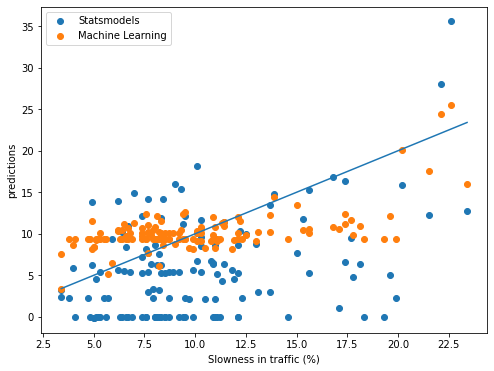

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(data["Slowness in traffic (%)"],predictions_SM, label="Statsmodels")
plt.scatter(data["Slowness in traffic (%)"],predictions_LR, label="Machine Learning")
u=np.linspace(data["Slowness in traffic (%)"].min(),data["Slowness in traffic (%)"].max(),5)
plt.plot(u,u)
plt.xlabel("Slowness in traffic (%)")
plt.ylabel("predictions")
plt.legend()
plt.show()

In [27]:
LR2 = LinearRegression(fit_intercept=False)
# fitting the training data
LR2.fit(x_train,y_train)
predictions_LR2=LR2.predict(features)

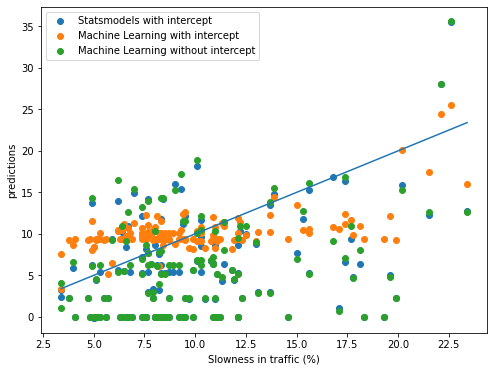

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(data["Slowness in traffic (%)"],predictions_SM, label="Statsmodels with intercept")
plt.scatter(data["Slowness in traffic (%)"],predictions_LR, label="Machine Learning with intercept")
plt.scatter(data["Slowness in traffic (%)"],predictions_LR2, label="Machine Learning without intercept")
u=np.linspace(data["Slowness in traffic (%)"].min(),data["Slowness in traffic (%)"].max(),5)
plt.plot(u,u)
plt.xlabel("Slowness in traffic (%)")
plt.ylabel("predictions")
plt.legend()
plt.show()

¿Cuáles son los errores de los modelos?

In [29]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# predicting the accuracy score
score_SM=r2_score(target,predictions_SM)
score_LR=r2_score(target,predictions_LR)
score_LR2=r2_score(target,predictions_LR2)
RMS2_SM=np.sqrt(mean_squared_error(target,predictions_SM))
RMS2_LR=np.sqrt(mean_squared_error(target,predictions_LR))
RMS2_LR2=np.sqrt(mean_squared_error(target,predictions_LR2))

for i,j in zip([score_SM,score_LR,score_LR2],["score_SM","score_LR","score_LR2"]):
    print(j," is ",i)
for i,j in zip([RMS2_SM,RMS2_LR,RMS2_LR2],["RMS2_SM","RMS2_LR","RMS2_LR2"]):
    print(j," is ",i)

score_SM  is  -1.6796065222448844
score_LR  is  0.35187998379618113
score_LR2  is  -1.7252278373234984
RMS2_SM  is  7.1159094924779485
RMS2_LR  is  3.499633939144508
RMS2_LR2  is  7.176229359897331


Ahora intentemos algunos otros mecanismos no paramétricos para intentar una nueva regresión.
Digamos por ejemplo Random Forest!!!!!

In [30]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100)
 
# fit the regressor with x and y data
regressor.fit(features, target) 
predictions_RF=regressor.predict(features)

In [31]:
score_RF=r2_score(target,predictions_RF)
RMS2_RF=np.sqrt(mean_squared_error(target,predictions_RF))

In [32]:
for i,j in zip([score_SM,score_LR,score_LR2,score_RF],["score_SM","score_LR","score_LR2","score_RF"]):
    print(j," is ",i)
for i,j in zip([RMS2_SM,RMS2_LR,RMS2_LR2,RMS2_RF],["RMS2_SM","RMS2_LR","RMS2_LR2","RMS2_RF"]):
    print(j," is ",i)

score_SM  is  -1.6796065222448844
score_LR  is  0.35187998379618113
score_LR2  is  -1.7252278373234984
score_RF  is  0.645054243753866
RMS2_SM  is  7.1159094924779485
RMS2_LR  is  3.499633939144508
RMS2_LR2  is  7.176229359897331
RMS2_RF  is  2.589857665405798


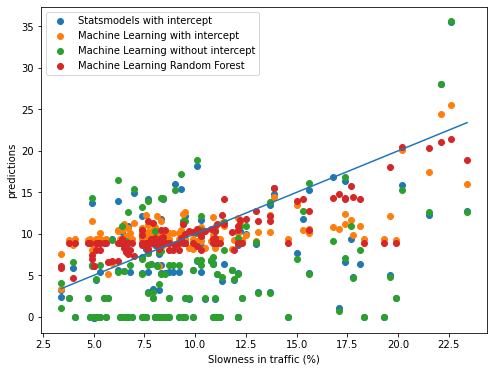

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(data["Slowness in traffic (%)"],predictions_SM, label="Statsmodels with intercept")
plt.scatter(data["Slowness in traffic (%)"],predictions_LR, label="Machine Learning with intercept")
plt.scatter(data["Slowness in traffic (%)"],predictions_LR2, label="Machine Learning without intercept")
plt.scatter(data["Slowness in traffic (%)"],predictions_RF, label="Machine Learning Random Forest")
u=np.linspace(data["Slowness in traffic (%)"].min(),data["Slowness in traffic (%)"].max(),5)
plt.plot(u,u)
plt.xlabel("Slowness in traffic (%)")
plt.ylabel("predictions")
plt.legend()
plt.show()

¿Cómo podemos predecir ahora a una situacuón como la siguiente???
x_new=[0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,0]

In [34]:
x_new=np.array([0,1,1,0,1,0,1,0,1,0,0,1,1,0,0,0])
regressor.predict(x_new.reshape(1,-1))

c:\Python\py39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([8.3])

In [35]:
LR.predict(x_new.reshape(1,-1))

c:\Python\py39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.3210267])

In [36]:
LR2.predict(x_new.reshape(1,-1))

c:\Python\py39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11.46895309])

Feature: Immobilized bus, Score: 0.05315
Feature: Broken Truck, Score: 0.13871
Feature: Vehicle excess, Score: 0.01737
Feature: Accident victim, Score: 0.07670
Feature: Running over, Score: 0.04578
Feature: Fire vehicles, Score: 0.02426
Feature: Occurrence involving freight, Score: 0.00034
Feature: Incident involving dangerous freight, Score: 0.00116
Feature: Lack of electricity, Score: 0.14629
Feature: Fire, Score: 0.00135
Feature: Point of flooding, Score: 0.29757
Feature: Manifestations, Score: 0.01093
Feature: Defect in the network of trolleybuses, Score: 0.08728
Feature: Tree on the road, Score: 0.01584
Feature: Semaphore off, Score: 0.06914
Feature: Intermittent Semaphore, Score: 0.01413


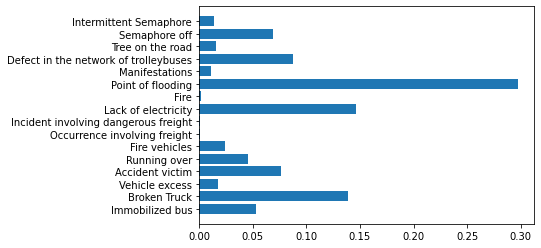

In [37]:
# get importance
var_RF=regressor.feature_names_in_
importance_RF = regressor.feature_importances_
# summarize feature importance
for i,v in zip(var_RF,importance_RF):
	print('Feature: %s, Score: %.5f' % (i,v))
# plot feature importance
plt.barh(var_RF, importance_RF)
plt.show()

In [38]:
from sklearn import tree

In [39]:
#fn=data.feature_names
#cn=data.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=800)
tree.plot_tree(regressor.estimators_[0],
               feature_names = X.columns, 
               class_names=["Slow traffic (%)"],
               filled = True, fontsize=4)
fig.savefig('rf_individualtree.png')

